In [181]:
# !pip install --upgrade pip

In [182]:
# !pip install yfinance

In [183]:
# import libraries

import numpy as np 
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import StandardScaler # use it because kmean is sentsitive for the wide range of features, then we apply it for normalization

import matplotlib.pyplot as plt 
%matplotlib inline

In [184]:
start = "2010-01-01"
end = "2023-12-31"

In [185]:
baba_df = yf.download("BABA", start = start, end = end, progress = False) # raw data
baba_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,92.644608,271879400
2014-09-22,92.699997,92.949997,89.500000,89.889999,88.697670,66657800
2014-09-23,88.940002,90.480003,86.620003,87.169998,86.013741,39009800
2014-09-24,88.470001,90.570000,87.220001,90.570000,89.368645,32088000
2014-09-25,91.089996,91.500000,88.500000,88.919998,87.740532,28598000


In [186]:
baba_df.shape

(2336, 6)

In [187]:
baba_df.index

DatetimeIndex(['2014-09-19', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26', '2014-09-29', '2014-09-30',
               '2014-10-01', '2014-10-02',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=2336, freq=None)

In [188]:
type(baba_df)

pandas.core.frame.DataFrame

In [189]:
stock = baba_df.copy()
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,92.644608,271879400
2014-09-22,92.699997,92.949997,89.500000,89.889999,88.697670,66657800
2014-09-23,88.940002,90.480003,86.620003,87.169998,86.013741,39009800
2014-09-24,88.470001,90.570000,87.220001,90.570000,89.368645,32088000
2014-09-25,91.089996,91.500000,88.500000,88.919998,87.740532,28598000


In [190]:
stock.shape

(2336, 6)

Text(0.5, 1.0, 'Adj Close')

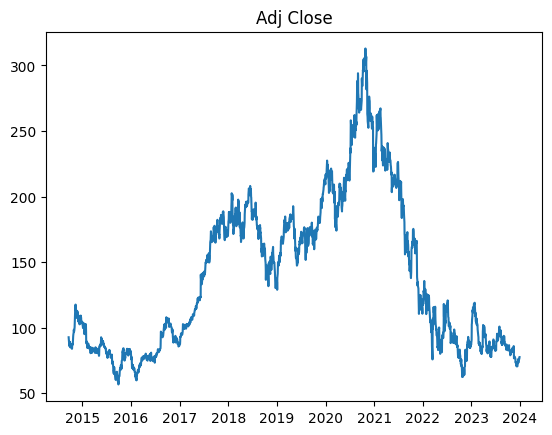

In [191]:
# plot 

plt.plot(stock['Adj Close'])
plt.title('Adj Close')

In [192]:
# get feature for clustering

# calculate log return
stock['Log Rets'] = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,92.644608,271879400,NaN
2014-09-22,92.699997,92.949997,89.500000,89.889999,88.697670,66657800,-0.043537
2014-09-23,88.940002,90.480003,86.620003,87.169998,86.013741,39009800,-0.030727
2014-09-24,88.470001,90.570000,87.220001,90.570000,89.368645,32088000,0.038263
2014-09-25,91.089996,91.500000,88.500000,88.919998,87.740532,28598000,-0.018386


In [242]:
np.log(88.697670/92.644608)

-0.04353713286995342

In [193]:
stock.shape

(2336, 7)

In [194]:
stock.dropna(inplace = True)

In [195]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2014-09-22,92.699997,92.949997,89.500000,89.889999,88.697670,66657800,-0.043537
2014-09-23,88.940002,90.480003,86.620003,87.169998,86.013741,39009800,-0.030727
2014-09-24,88.470001,90.570000,87.220001,90.570000,89.368645,32088000,0.038263
2014-09-25,91.089996,91.500000,88.500000,88.919998,87.740532,28598000,-0.018386
2014-09-26,89.730003,90.459999,88.660004,90.459999,89.260109,18340000,0.017171


In [196]:
stock.shape

(2335, 7)

In [197]:
# prepare features to be used for clustering

stock['Rets Mean'] = stock['Log Rets'].rolling(5).mean() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean
Date,,,,,,,,
2014-09-22,92.699997,92.949997,89.500000,89.889999,88.697670,66657800,-0.043537,NaN
2014-09-23,88.940002,90.480003,86.620003,87.169998,86.013741,39009800,-0.030727,NaN
2014-09-24,88.470001,90.570000,87.220001,90.570000,89.368645,32088000,0.038263,NaN
2014-09-25,91.089996,91.500000,88.500000,88.919998,87.740532,28598000,-0.018386,NaN
2014-09-26,89.730003,90.459999,88.660004,90.459999,89.260109,18340000,0.017171,-0.007443


In [198]:
stock['Rets STD'] = stock['Log Rets'].rolling(5).std() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2014-09-22,92.699997,92.949997,89.500000,89.889999,88.697670,66657800,-0.043537,NaN,NaN
2014-09-23,88.940002,90.480003,86.620003,87.169998,86.013741,39009800,-0.030727,NaN,NaN
2014-09-24,88.470001,90.570000,87.220001,90.570000,89.368645,32088000,0.038263,NaN,NaN
2014-09-25,91.089996,91.500000,88.500000,88.919998,87.740532,28598000,-0.018386,NaN,NaN
2014-09-26,89.730003,90.459999,88.660004,90.459999,89.260109,18340000,0.017171,-0.007443,0.03413


In [199]:
stock.dropna(inplace = True)
stock.head()

# or we can use
# stock = stock.dropna()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2014-09-26,89.730003,90.459999,88.660004,90.459999,89.260109,18340000,0.017171,-0.007443,0.034130
2014-09-29,89.620003,89.699997,88.019997,88.750000,87.572784,25302000,-0.019084,-0.002553,0.029037
2014-09-30,89.000000,90.879997,88.459999,88.849998,87.671463,24419400,0.001126,0.003818,0.024441
2014-10-01,88.699997,88.940002,86.040001,86.099998,84.957939,24029600,-0.031440,-0.010123,0.019200
2014-10-02,86.269997,88.199997,85.611000,87.059998,85.905205,21469700,0.011088,-0.004228,0.020508


In [200]:
stock.shape

(2331, 9)

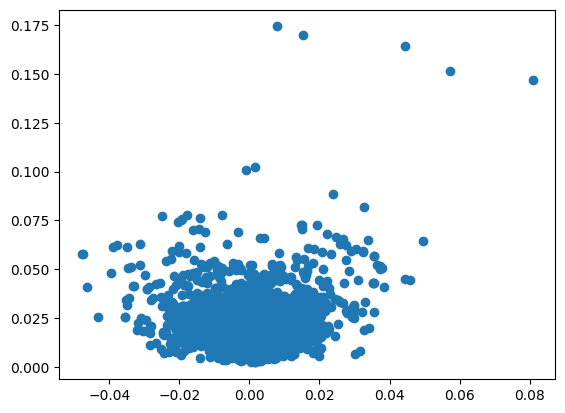

In [201]:
# plot

plt.scatter(stock['Rets Mean'], stock['Rets STD']); # plot X and y

In [202]:
# get array X in order to perform clustering

X1 = stock['Rets Mean']
X1

Date
2014-09-26   -0.007443
2014-09-29   -0.002553
2014-09-30    0.003818
2014-10-01   -0.010123
2014-10-02   -0.004228
                ...   
2023-12-22    0.004727
2023-12-26    0.008042
2023-12-27    0.004572
2023-12-28    0.010335
2023-12-29    0.003252
Name: Rets Mean, Length: 2331, dtype: float64

In [203]:
type(X1)

pandas.core.series.Series

In [204]:
X2 = stock['Rets STD']
X2

Date
2014-09-26    0.034130
2014-09-29    0.029037
2014-09-30    0.024441
2014-10-01    0.019200
2014-10-02    0.020508
                ...   
2023-12-22    0.023878
2023-12-26    0.022607
2023-12-27    0.021467
2023-12-28    0.018926
2023-12-29    0.010154
Name: Rets STD, Length: 2331, dtype: float64

In [205]:
type(X2)

pandas.core.series.Series

In [206]:
X1 = stock['Rets Mean'].values
X1

array([-0.00744321, -0.00255267,  0.00381788, ...,  0.00457163,
        0.01033499,  0.00325168])

In [207]:
X2 = stock['Rets STD'].values
X2

array([0.03413033, 0.02903737, 0.02444137, ..., 0.02146687, 0.01892569,
       0.01015397])

In [208]:
type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

In [209]:
X = np.array(list(zip(X1, X2)))
X

array([[-0.00744321,  0.03413033],
       [-0.00255267,  0.02903737],
       [ 0.00381788,  0.02444137],
       ...,
       [ 0.00457163,  0.02146687],
       [ 0.01033499,  0.01892569],
       [ 0.00325168,  0.01015397]])

In [210]:
type(X)

numpy.ndarray

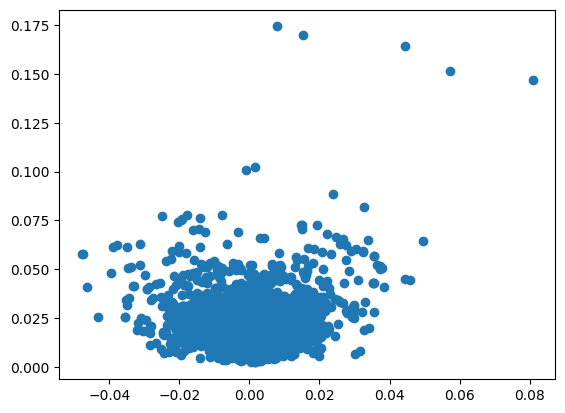

In [211]:
# plot 

plt.scatter(X[:, 0], X[:, 1]); # not need to use stock dataframe

In [212]:
# feature X are not bad but require normalization for kmean - better

def normalizedFeature(x):
    sc = StandardScaler()
    x = sc.fit_transform(x)

    return x


In [213]:
# call a function and keep data in X_norm
X_norm = normalizedFeature(X)
X_norm

array([[-0.64642521,  0.86102206],
       [-0.2179584 ,  0.49902732],
       [ 0.34017362,  0.17235457],
       ...,
       [ 0.40621077, -0.039066  ],
       [ 0.911146  , -0.21968672],
       [ 0.29056827, -0.84315945]])

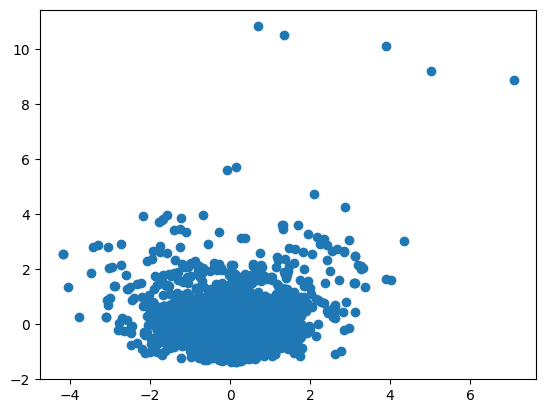

In [214]:
# plot 

plt.scatter(X_norm[:, 0], X_norm[:, 1]);

In [215]:
# start KMean Clustering

# prepare a function for distance between 2 points

def distance_fn(a, b, ax = 1):
    return np.linalg.norm(a-b, axis = ax) # Euclidean distance

In [216]:
def plotCluster(data, C, K, cluster_label):

    colors = ['green', 'blue', 'orange', 'red', 'yellow', 'pink', 'purple', 'salmon']

    plt.figure(figsize = (8, 6))

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i]) # find data for each cluster
        plt.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i]) # plot
        plt.annotate(i, (C[i, 0], C[i, 1]), size = 20)
        
    plt.scatter(C[:, 0], C[:, 1], marker = '*', color = 'black', s = 200)

    plt.xlabel('Rets Mean')
    plt.ylabel('Rets STD')
    plt.title('Cluster')

In [217]:
def kmeanClustering(data, K):

    # step 1. random centroids
    C_x = np.random.randint(np.min(data[:, 0]), np.max(data[:, 0]), size = K)
    C_y = np.random.randint(np.min(data[:, 1]), np.max(data[:, 1]), size = K)

    # set Centroid to variable C
    C = np.zeros((K, 2))
    C_old = np.zeros(C.shape)

    C[:, 0] = C_x 
    C[:, 1] = C_y 

    # Step 2. label data
    cluster_label = np.zeros((len(data), 1))

    for i in range(len(data)): # run 150 rounds - depands on length of data
        distance = distance_fn(data[i, :], C)
        cluster = np.argmin(distance) # for the shortest distance
        cluster_label[i] = cluster

    # Step 3. calculate new centroids
    C_old = C.copy()

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        C[i] = np.mean(points, axis = 0) # calculate mean and keep in C for each group (i)

    # Calculate error
    error = distance_fn(C, C_old, None)
    
    # Plot
    plotCluster(data, C, K, cluster_label)

    # Check if error is ok to stop
    while error != 0: # will stop when error = 0
    
        cluster_label = np.zeros((len(data), 1))
    
        for i in range(len(data)):
            distance = distance_fn(data[i, :], C)
            cluster = np.argmin(distance)
            cluster_label[i] = cluster
    
        C_old = C.copy()
    
        for i in range(K):
            points = []
            points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
            C[i] = np.mean(points, axis=0)
        
        plotCluster(data, C, K, cluster_label.copy())
    
        error = distance_fn(C, C_old, None)
        print(error)

    return cluster_label

1.0123985359265844
1.4239597792887628
1.3700891741227441
0.734890924584653
0.5336591183599642
0.4716819176378372
0.3372150032906388
0.18579575278347638
0.10182278186891836
0.06950472921628244
0.053990880045063146
0.012039289229336175
0.0


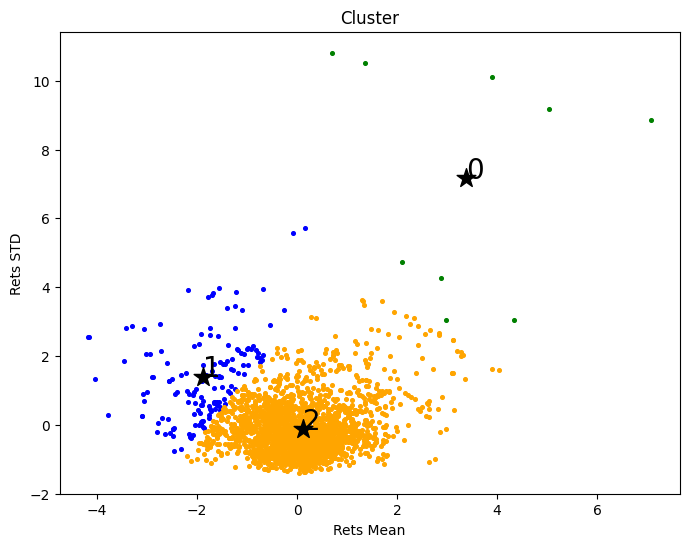

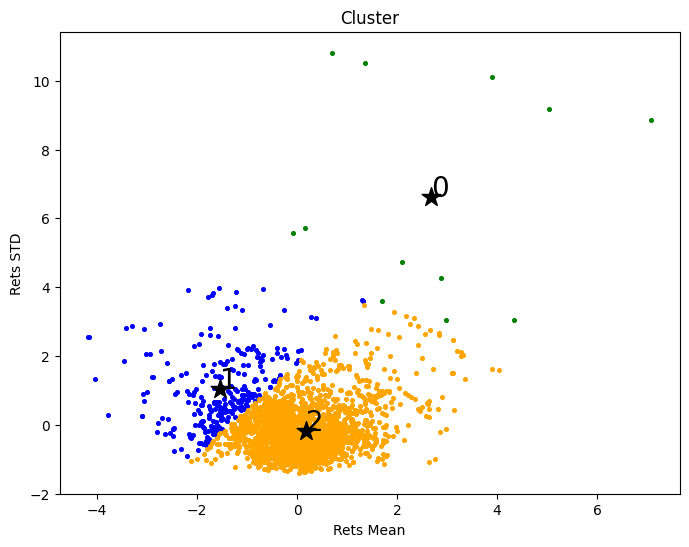

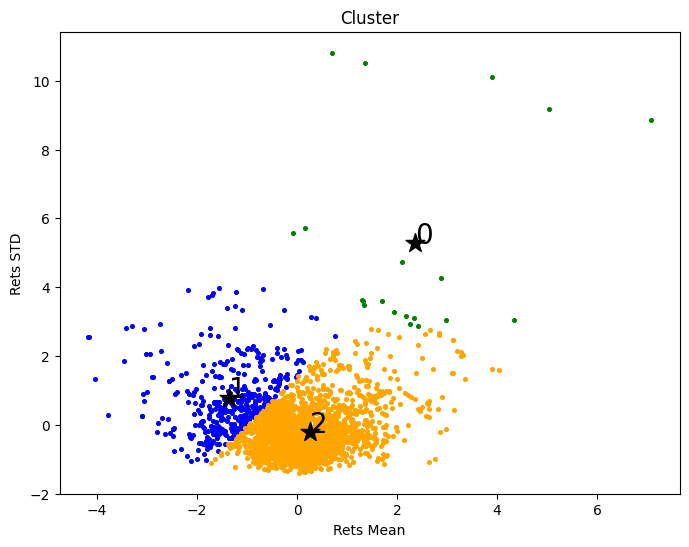

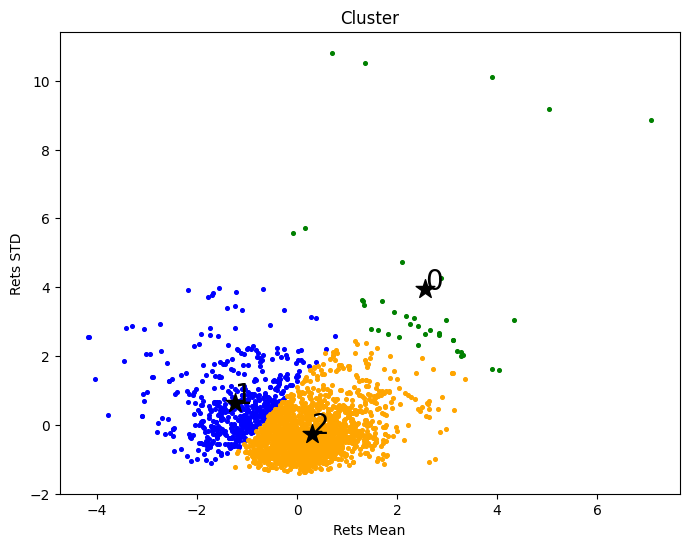

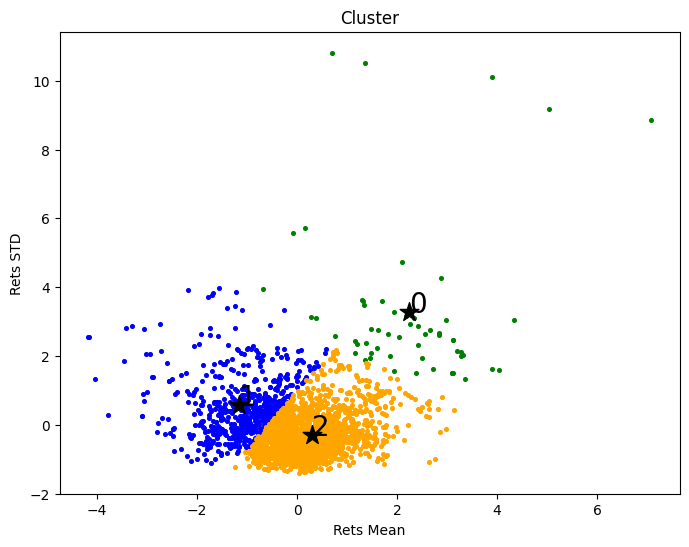

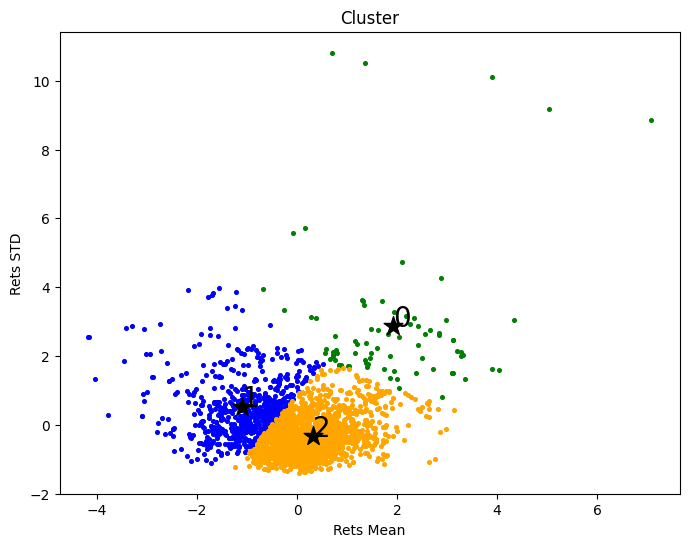

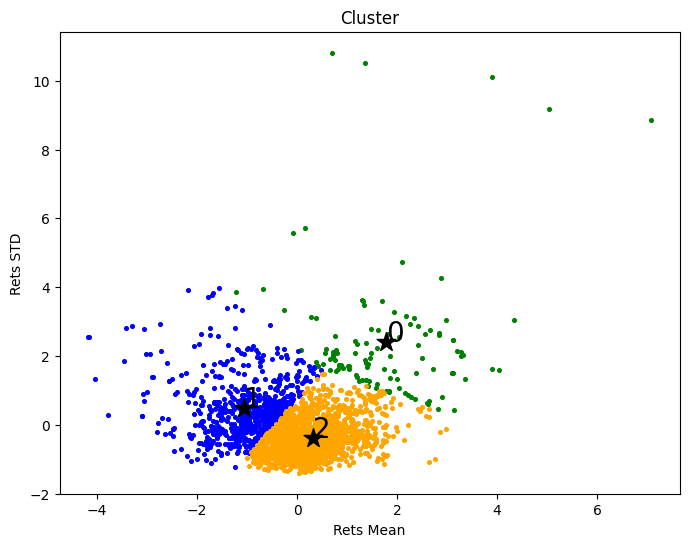

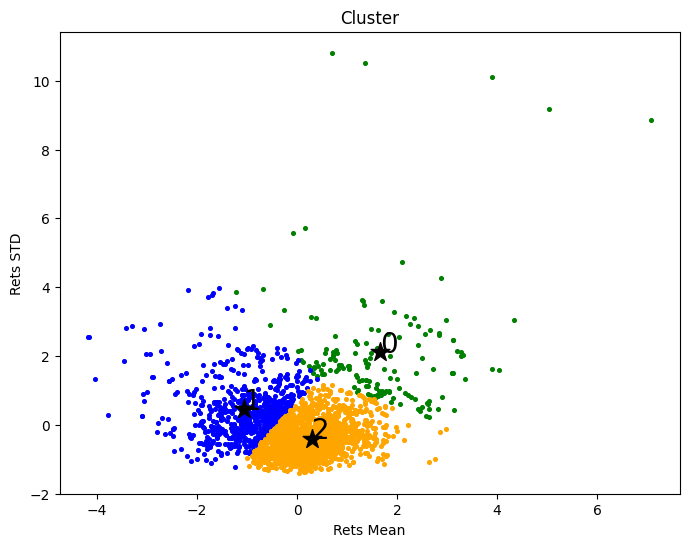

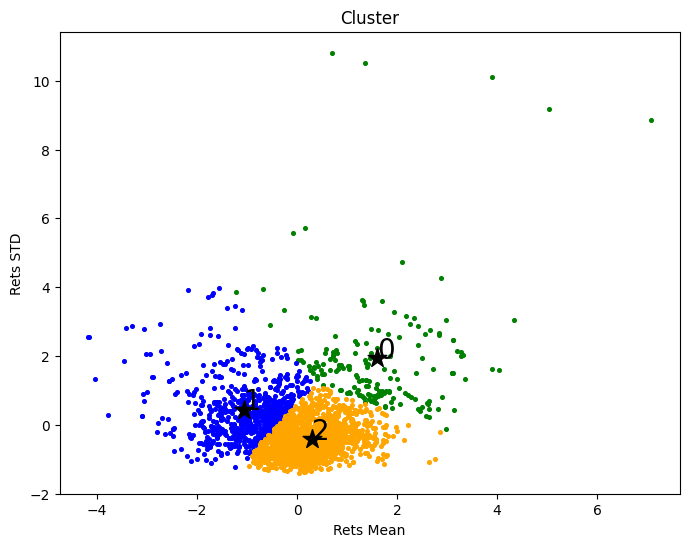

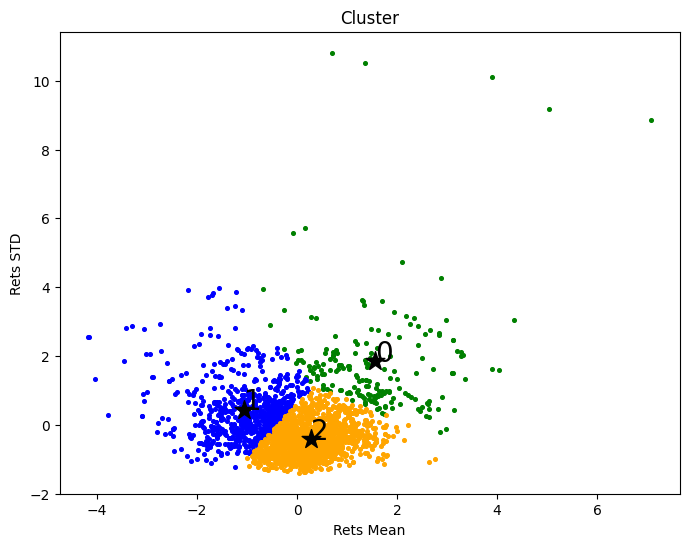

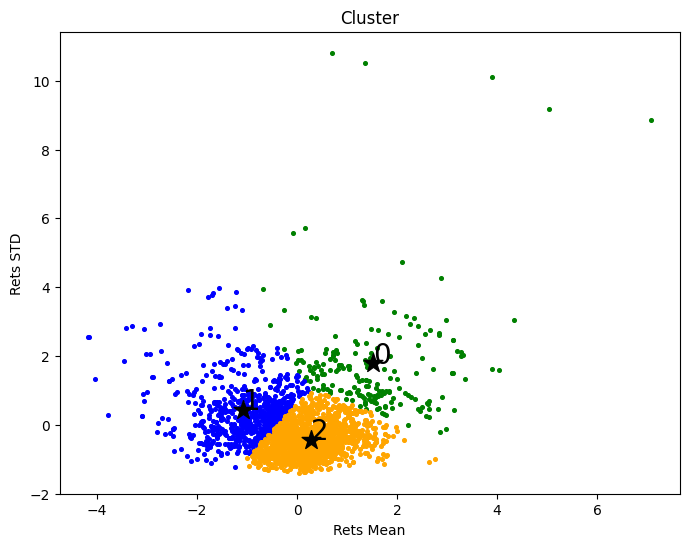

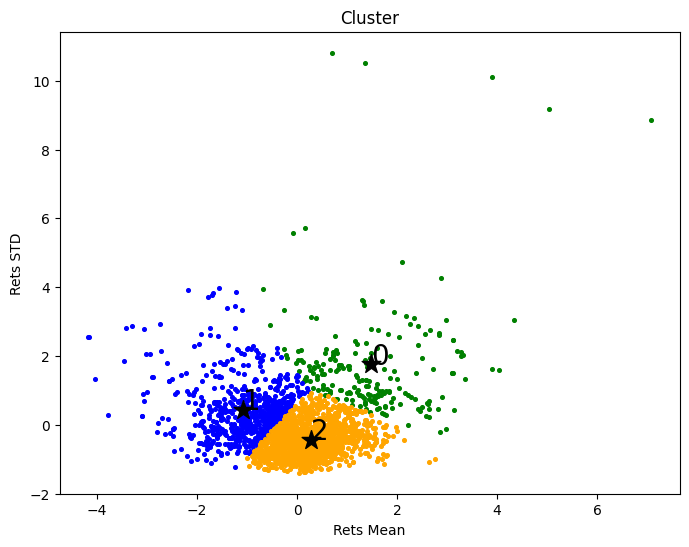

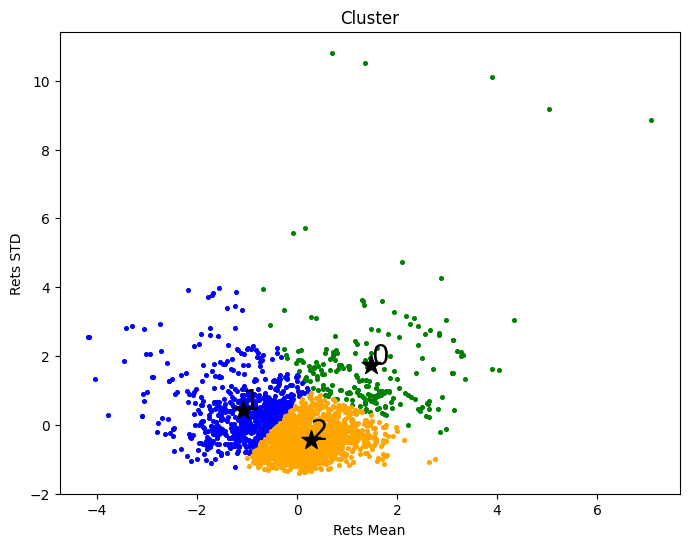

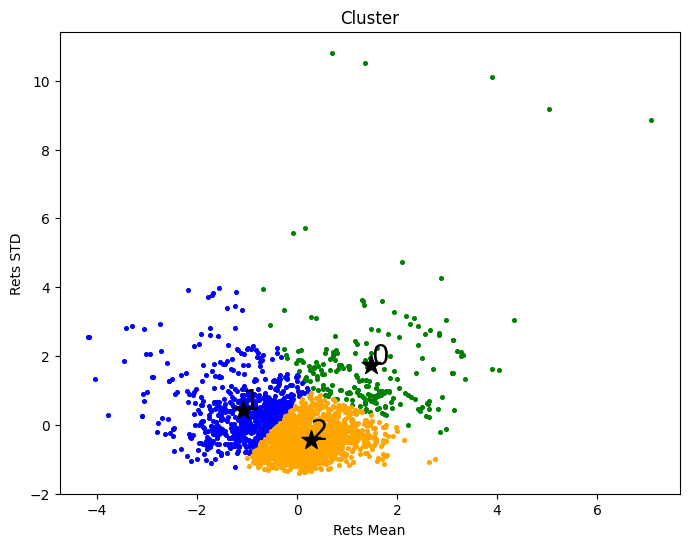

In [218]:
# call a function
K = 3
label_kmean = kmeanClustering(X_norm, K)

In [219]:
label_kmean

array([[1.],
       [1.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]])

### Use label from KMean

In [220]:
stock['Class'] = label_kmean 
stock.head(10)

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD,Class
Date,,,,,,,,,,
2014-09-26,89.730003,90.459999,88.660004,90.459999,89.260109,18340000,0.017171,-0.007443,0.034130,1.0
2014-09-29,89.620003,89.699997,88.019997,88.750000,87.572784,25302000,-0.019084,-0.002553,0.029037,1.0
2014-09-30,89.000000,90.879997,88.459999,88.849998,87.671463,24419400,0.001126,0.003818,0.024441,2.0
2014-10-01,88.699997,88.940002,86.040001,86.099998,84.957939,24029600,-0.031440,-0.010123,0.019200,1.0
2014-10-02,86.269997,88.199997,85.611000,87.059998,85.905205,21469700,0.011088,-0.004228,0.020508,2.0
2014-10-03,88.099998,89.940002,87.650002,88.099998,86.931412,18485700,0.011875,-0.005287,0.019223,2.0
2014-10-06,89.150002,89.650002,88.059998,88.309998,87.138618,9268400,0.002381,-0.000994,0.017709,2.0
2014-10-07,87.949997,89.699997,87.059998,87.669998,86.507111,12791700,-0.007274,-0.002674,0.017855,2.0
2014-10-08,88.000000,88.500000,87.059998,88.300003,87.128761,10252600,0.007160,0.005046,0.007850,2.0


In [221]:
# idea to trade

idx_c0 = np.where(stock['Class'] == 0) # find index in class 0
idx_c0

(array([  32,   33,   34,  153,  154,  155,  156,  157,  243,  256,  257,
         258,  259,  260,  271,  272,  273,  274,  275,  348,  349,  350,
         351,  352,  420,  421,  423,  473,  474,  475,  476,  477,  679,
         680,  681,  682,  683,  825,  826, 1021, 1025, 1028, 1032, 1033,
        1034, 1035, 1036, 1037, 1075, 1076, 1077, 1078, 1079, 1092, 1093,
        1096, 1383, 1384, 1385, 1452, 1453, 1454, 1455, 1456, 1457, 1458,
        1490, 1540, 1579, 1582, 1583, 1585, 1586, 1589, 1590, 1591, 1592,
        1600, 1601, 1624, 1645, 1646, 1647, 1648, 1649, 1739, 1741, 1742,
        1743, 1770, 1771, 1772, 1773, 1774, 1778, 1812, 1813, 1814, 1815,
        1824, 1828, 1829, 1830, 1831, 1832, 1837, 1838, 1849, 1850, 1851,
        1852, 1853, 1856, 1857, 1858, 1859, 1880, 1881, 1882, 1883, 1884,
        1885, 1886, 1887, 1888, 1893, 1911, 1912, 1913, 1914, 1915, 1922,
        1923, 1924, 1925, 1927, 1930, 1931, 1932, 1933, 1934, 1936, 1937,
        1938, 1939, 1940, 1941, 1942, 

In [222]:
len(idx_c0)

1

In [223]:
len(idx_c0[0])

208

In [224]:
idx_c1 = np.where(stock['Class'] == 1)
idx_c1

(array([   0,    1,    3,   35,   36,   37,   38,   39,   40,   45,   46,
          47,   48,   49,   52,   53,   54,   64,   70,   76,   77,   84,
          85,   86,   87,   88,   89,   91,   92,   93,   94,  107,  108,
         110,  111,  114,  150,  151,  177,  178,  189,  192,  193,  195,
         196,  219,  220,  221,  222,  223,  224,  226,  227,  228,  229,
         230,  231,  233,  234,  235,  236,  237,  238,  239,  240,  241,
         242,  248,  249,  250,  251,  252,  253,  282,  284,  285,  286,
         287,  288,  289,  305,  306,  307,  309,  319,  320,  321,  322,
         323,  324,  325,  326,  327,  328,  329,  330,  332,  336,  337,
         338,  339,  340,  341,  342,  343,  344,  345,  346,  418,  419,
         422,  424,  425,  426,  440,  441,  442,  506,  515,  516,  517,
         518,  536,  537,  538,  539,  540,  550,  551,  552,  553,  554,
         754,  755,  756,  757,  758,  770,  771,  774,  776,  800,  801,
         802,  803,  804,  805,  813, 

In [225]:
len(idx_c1[0])

655

In [226]:
idx_c2 = np.where(stock['Class'] == 2)
idx_c2

(array([   2,    4,    5, ..., 2328, 2329, 2330]),)

In [227]:
len(idx_c2[0])

1468

In [228]:
len(stock), len(idx_c0[0]) + len(idx_c1[0]) + len(idx_c2[0])

(2331, 2331)

In [229]:
# if we would like to trade only some class

profit_c0 = stock['Log Rets']
profit_c0

Date
2014-09-26    0.017171
2014-09-29   -0.019084
2014-09-30    0.001126
2014-10-01   -0.031440
2014-10-02    0.011088
                ...   
2023-12-22   -0.012934
2023-12-26    0.007543
2023-12-27    0.003422
2023-12-28    0.014738
2023-12-29    0.003490
Name: Log Rets, Length: 2331, dtype: float64

In [230]:
type(profit_c0)

pandas.core.series.Series

In [231]:
profit_c0 = np.array(profit_c0).reshape(-1, 1)
profit_c0

array([[ 0.01717072],
       [-0.01908441],
       [ 0.00112618],
       ...,
       [ 0.00342198],
       [ 0.01473776],
       [ 0.00348956]])

In [232]:
profit_c0[idx_c1, 0] = 0
profit_c0[idx_c2, 0] = 0
profit_c0

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Text(0.5, 1.0, 'Cluster 0 Profit')

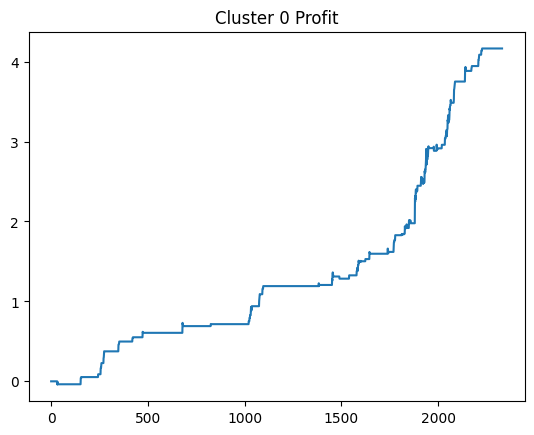

In [233]:
plt.plot(profit_c0.cumsum())
plt.title('Cluster 0 Profit')

In [234]:
profit_c1 = np.array(stock['Log Rets']).reshape(-1, 1)
profit_c1

array([[ 0.01717072],
       [-0.01908441],
       [ 0.00112618],
       ...,
       [ 0.00342198],
       [ 0.01473776],
       [ 0.00348956]])

In [235]:
profit_c1[idx_c0, 0] = 0
profit_c1[idx_c2, 0] = 0
profit_c1

array([[ 0.01717072],
       [-0.01908441],
       [ 0.        ],
       ...,
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

Text(0.5, 1.0, 'Cluster 1 Profit')

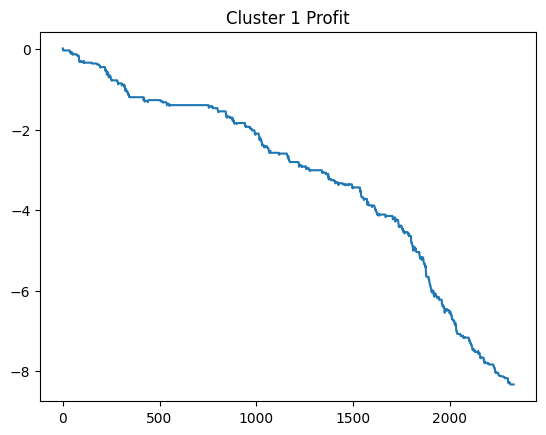

In [236]:
plt.plot(profit_c1.cumsum())
plt.title('Cluster 1 Profit')

In [237]:
profit_c2 = np.array(stock['Log Rets']).reshape(-1, 1)
profit_c2

array([[ 0.01717072],
       [-0.01908441],
       [ 0.00112618],
       ...,
       [ 0.00342198],
       [ 0.01473776],
       [ 0.00348956]])

In [238]:
profit_c2[idx_c0, 0] = 0
profit_c2[idx_c1, 0] = 0
profit_c2

array([[0.        ],
       [0.        ],
       [0.00112618],
       ...,
       [0.00342198],
       [0.01473776],
       [0.00348956]])

Text(0.5, 1.0, 'Cluster 2 Profit')

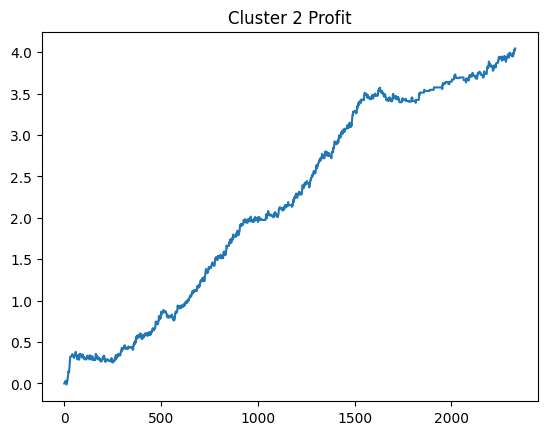

In [239]:
plt.plot(profit_c2.cumsum())
plt.title('Cluster 2 Profit')

*** Require to select the correct class and time before trade
- What we require to do more
    - Lock ahead bias
    - In sample & Out sample

In [240]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD,Class
Date,,,,,,,,,,
2014-09-26,89.730003,90.459999,88.660004,90.459999,89.260109,18340000,0.017171,-0.007443,0.034130,1.0
2014-09-29,89.620003,89.699997,88.019997,88.750000,87.572784,25302000,-0.019084,-0.002553,0.029037,1.0
2014-09-30,89.000000,90.879997,88.459999,88.849998,87.671463,24419400,0.001126,0.003818,0.024441,2.0
2014-10-01,88.699997,88.940002,86.040001,86.099998,84.957939,24029600,-0.031440,-0.010123,0.019200,1.0
2014-10-02,86.269997,88.199997,85.611000,87.059998,85.905205,21469700,0.011088,-0.004228,0.020508,2.0


In [243]:
stock.head(10)

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD,Class
Date,,,,,,,,,,
2014-09-26,89.730003,90.459999,88.660004,90.459999,89.260109,18340000,0.017171,-0.007443,0.034130,1.0
2014-09-29,89.620003,89.699997,88.019997,88.750000,87.572784,25302000,-0.019084,-0.002553,0.029037,1.0
2014-09-30,89.000000,90.879997,88.459999,88.849998,87.671463,24419400,0.001126,0.003818,0.024441,2.0
2014-10-01,88.699997,88.940002,86.040001,86.099998,84.957939,24029600,-0.031440,-0.010123,0.019200,1.0
2014-10-02,86.269997,88.199997,85.611000,87.059998,85.905205,21469700,0.011088,-0.004228,0.020508,2.0
2014-10-03,88.099998,89.940002,87.650002,88.099998,86.931412,18485700,0.011875,-0.005287,0.019223,2.0
2014-10-06,89.150002,89.650002,88.059998,88.309998,87.138618,9268400,0.002381,-0.000994,0.017709,2.0
2014-10-07,87.949997,89.699997,87.059998,87.669998,86.507111,12791700,-0.007274,-0.002674,0.017855,2.0
2014-10-08,88.000000,88.500000,87.059998,88.300003,87.128761,10252600,0.007160,0.005046,0.007850,2.0
